In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from sklearn.metrics import confusion_matrix

X = df.iloc[:, 2:-1].values
y = df.iloc[:, -1].values

x_scaler = StandardScaler()
X = x_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Applying Kernel PCA

k_pca = KernelPCA(n_components=2, kernel='rbf')
X_train = k_pca.fit_transform(X_train)
X_test = k_pca.transform(X_test)

In [16]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f'accuracy: {classifier.score(X_test, y_test)}')

cm = confusion_matrix(y_test, classifier.predict(X_test))
print(cm)

accuracy: 0.9
[[54  4]
 [ 4 18]]


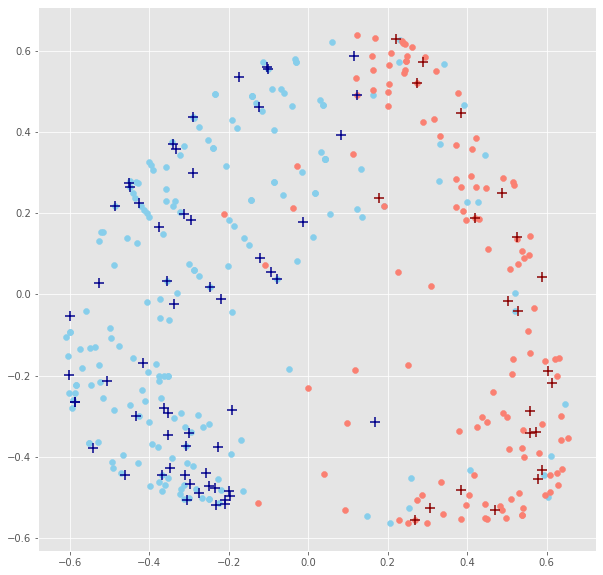

In [25]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

y_pred = classifier.predict(X_test)
plt.figure(figsize=(10, 10))

plt.scatter([x[0] for i, x in enumerate(X_train) if y_train[i] == 0], 
            [x[1] for i, x in enumerate(X_train) if y_train[i] == 0], 
            color='skyblue')

plt.scatter([x[0] for i, x in enumerate(X_train) if y_train[i] == 1], 
            [x[1] for i, x in enumerate(X_train) if y_train[i] == 1], 
            color='salmon')

plt.scatter([x[0] for i, x in enumerate(X_test) if y_pred[i] == 0], 
            [x[1] for i, x in enumerate(X_test) if y_pred[i] == 0], 
            color='darkblue', marker='+', s=100)

plt.scatter([x[0] for i, x in enumerate(X_test) if y_pred[i] == 1], 
            [x[1] for i, x in enumerate(X_test) if y_pred[i] == 1], 
            color='darkred', marker='+', s=100)

plt.show()